<a href="https://colab.research.google.com/github/brandoncohen23/Probability_Statistics-1/blob/main/Cohen_Stats_Final_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture 
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb # importing programs

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # defining codes to allow pictures to load from google slides

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
# loading pre-existing labels
model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1iixD8XxB1KLcYleQjO61rl7xhDNUqge-TSF6sm37fb4/edit#slide=id.g1a19eac43cf_0_0" # url link of my pictures from google slides

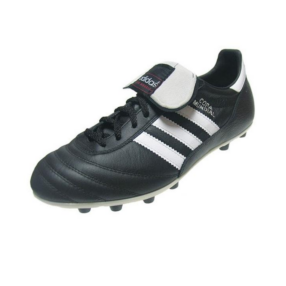

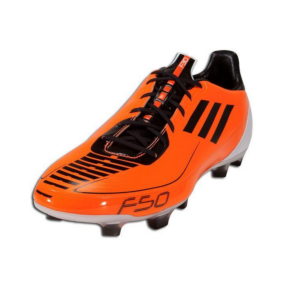

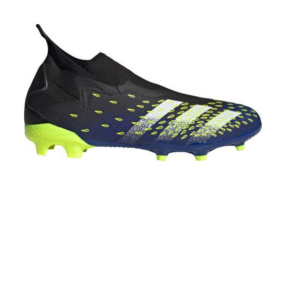

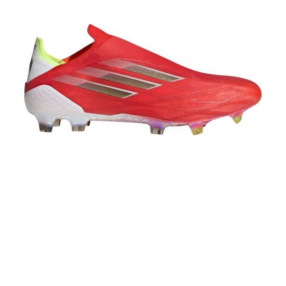

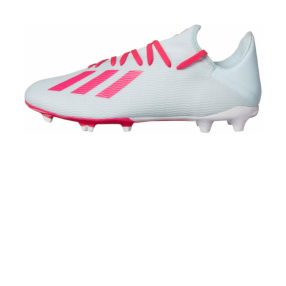

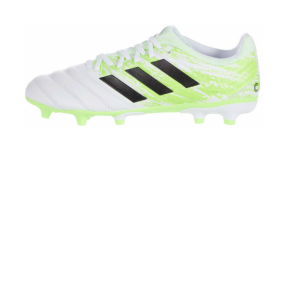

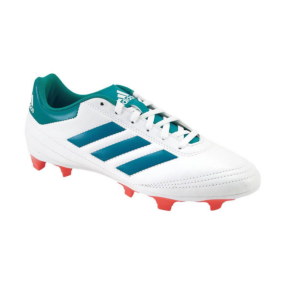

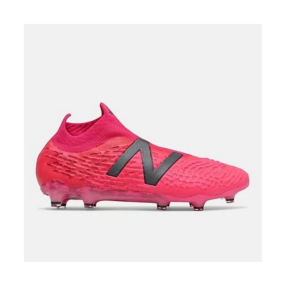

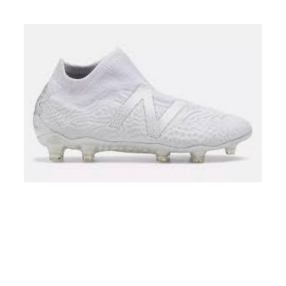

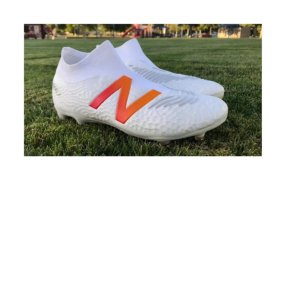

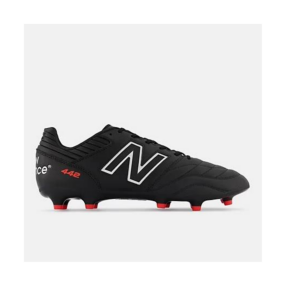

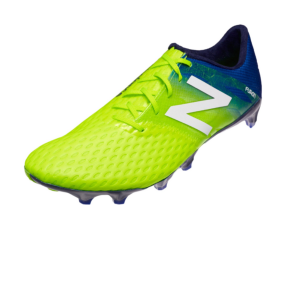

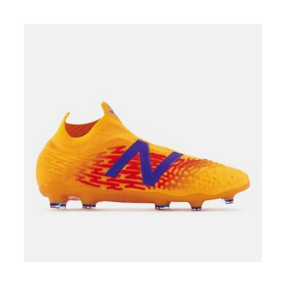

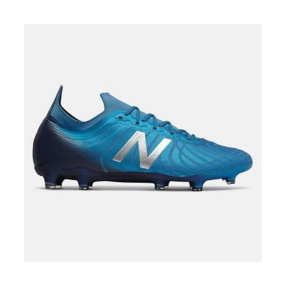

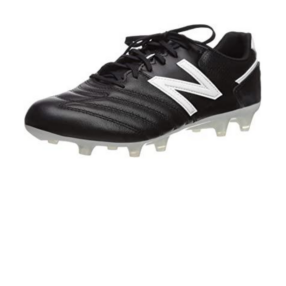

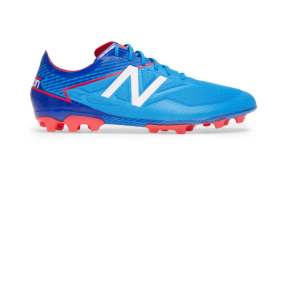

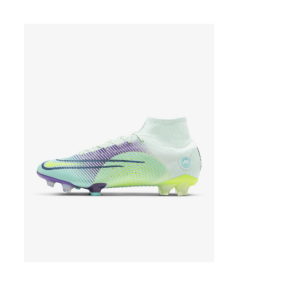

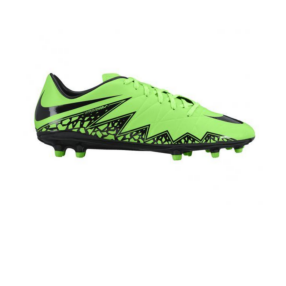

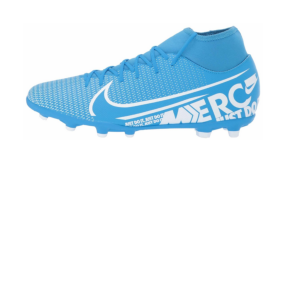

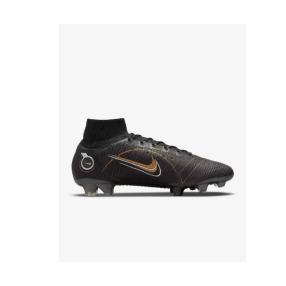

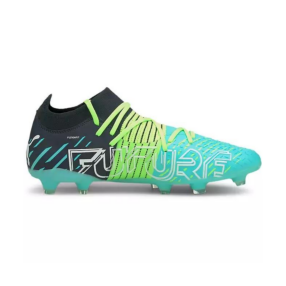

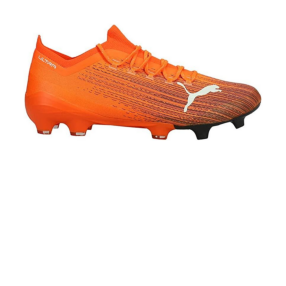

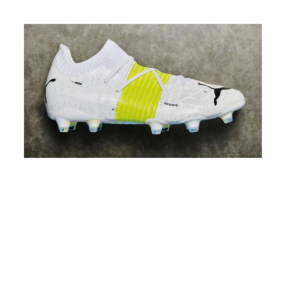

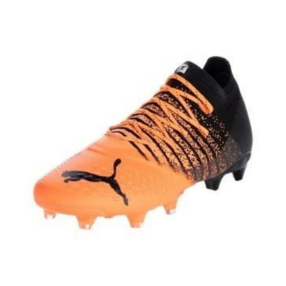

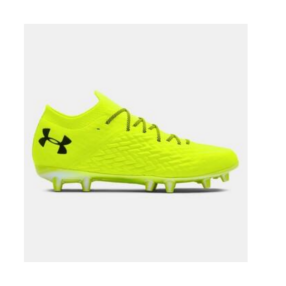

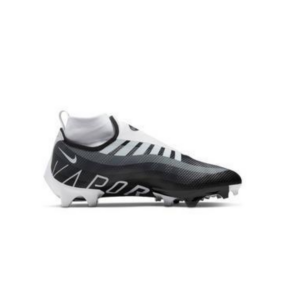

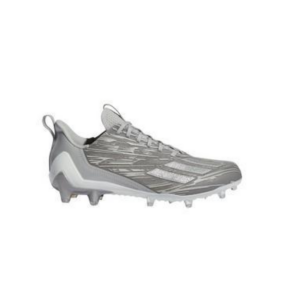

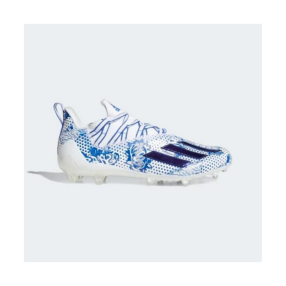

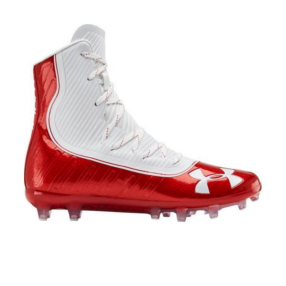

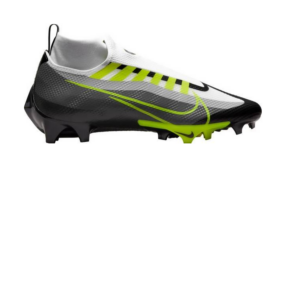

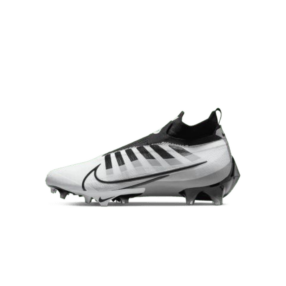

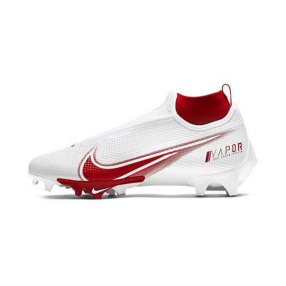

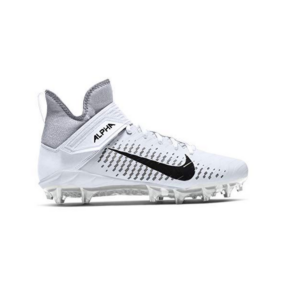

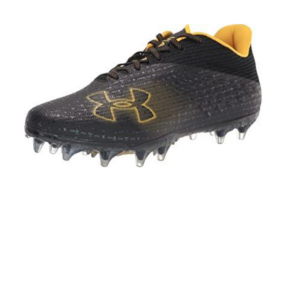

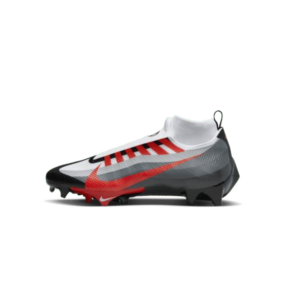

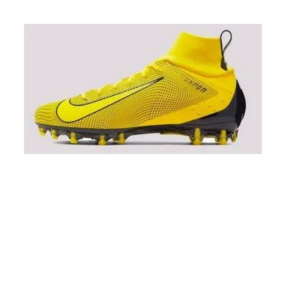

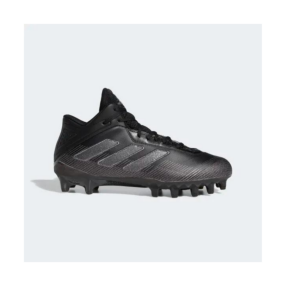

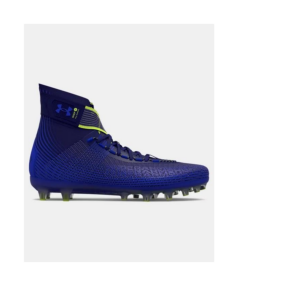

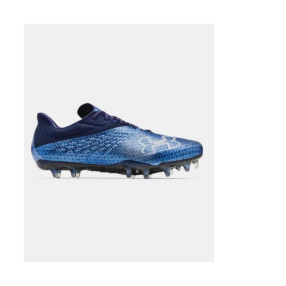

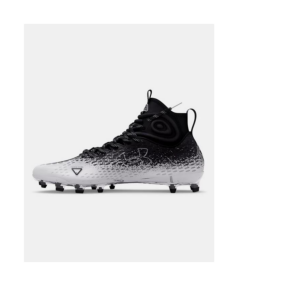

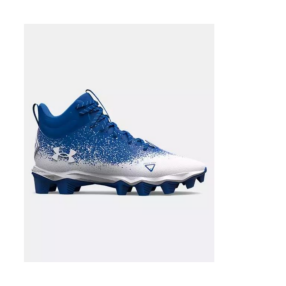

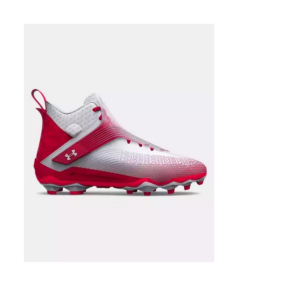

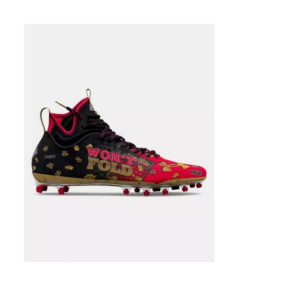

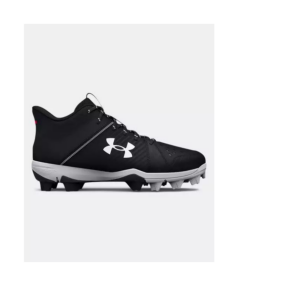

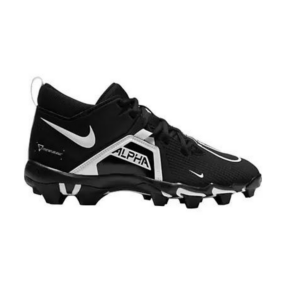

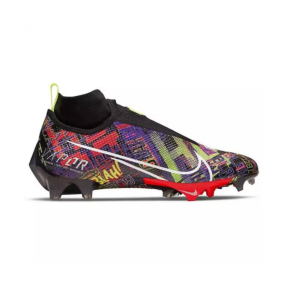

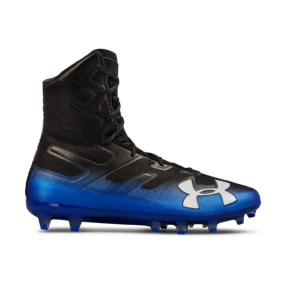

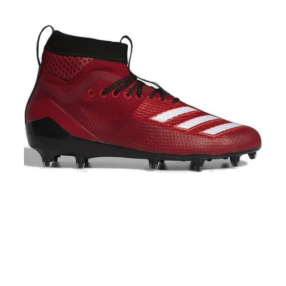

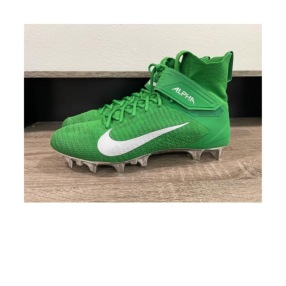

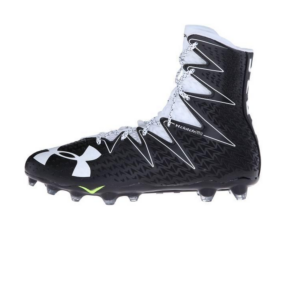

In [ ]:
images = [] # loads the images from google slides

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape # gives image amount and sizes

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) # data from images

tensor([[ 2.1266, -2.5895, -4.8248,  ..., -3.8470, -1.1773, -0.7285],
        [-3.5277, -0.2515, -1.4807,  ..., -6.6525,  0.1818,  1.6264],
        [ 1.4196, -1.3159, -0.7913,  ..., -3.3036,  2.2158,  2.8277],
        ...,
        [-1.0580, -0.6873, -3.3791,  ..., -4.1169, -1.8819, -0.4258],
        [-2.0175, -2.5793, -3.6821,  ..., -3.2296,  4.7526,  1.4045],
        [ 0.7765, -1.9231, -3.2175,  ..., -2.9620, -1.7693,  0.2195]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) # defines y as that command

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() # code from python to guess what's in the pictures

In [ ]:
for i in list(guesses): # loads the guesses of what's in each picture
    print(labels[i])

running shoe
running shoe
bow tie, bow-tie, bowtie
mortarboard
mortarboard
corkscrew, bottle screw
Band Aid
stretcher
studio couch, day bed
flagpole, flagstaff
warplane, military plane
sleeping bag
stretcher
warplane, military plane
running shoe
flagpole, flagstaff
nipple
hair slide
stretcher
mousetrap
hair slide
airship, dirigible
hair slide
panpipe, pandean pipe, syrinx
rule, ruler
corkscrew, bottle screw
ruffed grouse, partridge, Bonasa umbellus
iron, smoothing iron
corkscrew, bottle screw
airliner
running shoe
red wine
running shoe
American alligator, Alligator mississipiensis
snowmobile
stretcher
Loafer
stretcher
leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea
Norwegian elkhound, elkhound
candle, taper, wax light
corkscrew, bottle screw
hair slide
corkscrew, bottle screw
corkscrew, bottle screw
wallet, billfold, notecase, pocketbook
sleeping bag
studio couch, day bed
thresher, thrasher, threshing machine
black grouse


In [ ]:
Y = np.zeros(50,) # makes y gives the zeroes for each image
Y[25:] = 1 # makes 25 images equal to one for zeroes

In [ ]:
Y # the array of data for y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy()  # utilizing the numpy program

In [ ]:
X.shape

(50, 1000)

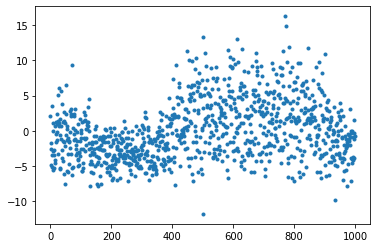

In [ ]:
plt.plot(X[0],'.') # plots data of first image

In [ ]:
X[0] # the plot points from the first image

array([ 2.12656450e+00, -2.58950353e+00, -4.82484341e+00, -1.74772561e+00,
       -3.43616056e+00,  3.50343108e+00, -5.13603926e+00, -2.80953026e+00,
       -1.27945393e-02, -5.59771061e+00,  1.16111791e+00, -2.76559567e+00,
       -3.43692875e+00, -5.20844746e+00, -4.51775742e+00, -4.06970167e+00,
        7.38490522e-01, -4.66311544e-01,  1.30045879e+00, -1.53824961e+00,
       -1.35178947e+00,  2.36523700e+00, -1.92658141e-01,  8.99822116e-01,
       -3.22465777e+00,  5.08939362e+00,  1.38052070e+00,  7.23482192e-01,
        6.02374506e+00,  1.10448754e+00, -5.21646976e+00, -5.37726545e+00,
       -5.52261710e-01,  1.73519778e+00,  5.64495564e+00, -1.11455202e+00,
        6.92335606e-01, -3.87296820e+00,  3.79022622e+00, -2.66355729e+00,
       -4.24760151e+00,  1.19884396e+00, -1.48721159e+00,  2.70932531e+00,
       -1.51511943e+00,  1.40521061e+00, -6.13449335e+00,  1.04992986e+00,
       -7.56341791e+00, -2.14305353e+00,  2.42496586e+00,  6.42315912e+00,
       -6.51935756e-01,  

In [ ]:
np.argmax(X[0]) # max value from the first image

770

In [ ]:
labels[948] # gives the label for that specific value

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] # defines top ten

In [ ]:
for i in top_ten: # loads labels for top ten
    print(labels[i])

running shoe
sandal
clog, geta, patten, sabot
joystick
screw
switch, electric switch, electrical switch
Loafer
hair slide
binoculars, field glasses, opera glasses
revolver, six-gun, six-shooter


In [ ]:
labels # loads all labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  2.,  31., 200., 276., 225., 134.,  79.,  40.,  11.,   2.]),
 array([-11.767318 ,  -8.967623 ,  -6.1679273,  -3.3682318,  -0.5685366,
          2.2311587,   5.030854 ,   7.8305492,  10.630244 ,  13.42994  ,
         16.229635 ], dtype=float32),
 <a list of 10 Patch objects>)

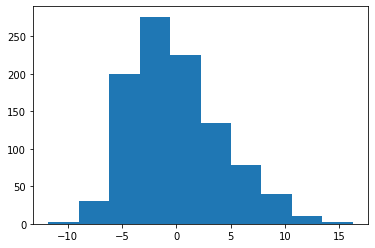

In [ ]:
plt.hist(X[0]) # creates a histogram of data from first image

In [ ]:
X = GPU_data(X) # defines x and y 
Y = GPU_data(Y)

In [ ]:
def softmax(x): # defines command to predict the distribution
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels): # defines the measuring of probability and error with performance           
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): # defines command to output random values

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): 
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape # shape of the data

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): # defines acquiring a batch of the data
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): # defines the model of the graph

    return x@w[0]

In [ ]:
def make_plots(): # defines command to make plots for the graph
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); # runs and plots data on wandb
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-1bfcfb837012>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

**Accuracy - Acc_Train**

First Run:   .6377 (64%) Best

Second Run:   .5534 (55%)

Third Run:   .5502 (55%) Worst

Average: .5804 (58%)

**Loss**

First Run: .6771 Best

Second Run: .7572

Third Run: .7676 Worst

Average: .734